# Clustering

## 1. keyword 정제
    1) 주요 태그 추출
    - description 내용 포함 태그
    - description과 일치하는 단어가 없는 태그는 태그 그대로 사용
    - 태그 없는 187개 스튜디오는 description에서 추출한 단어 사용
     
     2) 유사 단어 묶어주기
    - WordCloudVec으로 단어간 유사도 판별

    >> 타겟 스튜디오와 동일한 태그 개수 세기

## 2. 범주형 데이터 Gower로 수치형 데이터로 변환
    1) 범주형 데이터는 category와 

In [236]:
import numpy as np 
import pandas as pd 
from pandas import DataFrame as df
import csv
from konlpy.tag import Okt
from collections import Counter

In [691]:
import os
dataset = pd.read_csv("total_dataset_trim_newTag_scale.csv",encoding='utf-8')
dataset.tail()

,Unnamed: 0,index,NO,img_fold_no,studio_name,studio_picture,imafe_file,category,region,tag,price,area,floor,default_person,parking,description,new_tag1,new_tag2
1847,338,338,84,83,청주 고층 뷰 아파트,['https://s3.hourplace.co.kr/temp/images/2019/...,"['83_0_청주_고층_뷰_아파트.jpg', '83_1_청주_고층_뷰_아파트.jpg...",아파트,충북,#고층뷰#고층아파트#노을#불빛#석양#야경#청주지웰시티1차,75000,129,38,10,3,현재살고 있는 집이에요~\r\n이사올때 서향이라 고민했지만 365일 매일 다른 석양...,"['아파트', '석양', '청주', '야경', '고층', '노을', '매일', '석...","['아파트', '석양', '청주', '야경', '고층', '노을']"
1848,355,355,266,265,모던 & 로맨틱 인테리어 일산 신축 주상복합,['https://s3.hourplace.co.kr/temp/images/2019/...,"['265_0_모던_&_로맨틱_인테리어_일산_신축_주상복합.jpg', '265_1_...",아파트,경기,#골드&블루#일산#모던인테리어#심플#FullFurnished,62000,109,39,10,3,일산 신축 주상복합 건물입니다\r\n침실 3 화장실 2개의 33평형 집입니다.\r\...,"['일산', '블루', '심플', '골드', '모던', '연출', '칼라', '조율...","['일산', '블루', '골드']"
1849,1032,1032,416,415,부산이 한눈에 내려다 보이는 뷰 맛집,['https://s3.hourplace.co.kr/temp/images/2019/...,"['415_0_부산이_한눈에_내려다_보이는_뷰_맛집.jpg', '415_1_부산이_...",아파트,부산,#시티뷰#부산#동래구#야경#뷰맛집#부산촬영#노을#아파트#뷰#고층,38000,116,40,5,5,"부산광역시 동래구에 위치한 아시아드경기장이 바로 보이는 고층 아파트이며, 부산의 노...","['아파트', '야경', '부산', '촬영', '동래구', '고층', '노을', '...","['아파트', '야경', '부산', '고층', '노을', '맛집']"
1850,1033,1033,1059,36,부산이 한눈에 내려다 보이는 뷰 맛집,['https://s3.hourplace.co.kr/temp/images/2019/...,"['36_0_부산이_한눈에_내려다_보이는_뷰_맛집.jpg', '36_1_부산이_한눈...",아파트,부산,#시티뷰#부산#동래구#야경#뷰맛집#부산촬영#노을#아파트#뷰#고층,38000,116,40,5,5,"부산광역시 동래구에 위치한 아시아드경기장이 바로 보이는 고층 아파트이며, 부산의 노...","['아파트', '야경', '부산', '촬영', '동래구', '고층', '노을', '...","['아파트', '야경', '부산', '고층', '노을', '맛집']"
1851,1279,1279,1208,59,"멋진 사무실, 럭셔리한 회의실 촬영이 필요하다면? 로프에잇 킨텍스",['https://s3.hourplace.co.kr/temp/images/2019/...,"['59_0_멋진_사무실,_럭셔리한_회의실_촬영이_필요하다면?_로프에잇_킨텍스.jp...",사무실,경기,#일산회의실촬영#일산회의실#일산세미나실#일산소호사무실#회의실촬영#회사촬영#사무실촬영...,62000,83,41,10,49,안녕하세요 일산 프라이빗 회의실 렌탈공간 로프에잇입니다.\r\n\r\n킨텍스 도보 ...,"['세미나', '회의실', '일산', '촬영', '소호', '사무실', '회사', ...","['회의실', '일산', '사무실']"


In [702]:
## description 다듬기
def getDescList(n):
    okt=Okt()
    descList=[]
    for i in range(n):
        tempList=[]
        descript=(dataset.description[i]) # 한글자 이상만 뽑음
        descript=descript.replace("\n","")
        descript=descript.replace("\r","")
        descript=descript.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣09]","")
        tempList=[j[0] for j in okt.pos(descript) if ((len(j[0])>1)& (len(j[0])<7)& (j[1]=="Noun"))]
        tempList=list(set(tempList))
        if len(tempList)>0:
            descList.append(tempList)
        else:
            descList.append(tempList)
#             print(tempList,"|",i) #빈 태그
                                    # [] | 92
                                    # [] | 988
                                    # [] | 1486
                                    # [] | 1806
    return descList

In [703]:
# descList=getDescList(len(dataset))
# descList

In [704]:
# len(descList)

In [705]:
## Tag 다듬기
## 복합명사로 이루어진 태그는 잘라서 길이 2~7 사이의 단어만 추출
def getTagList(n):
    parseTagList=[]
    okt=Okt()
    for i in range(n):
        tempTagList=[]
        tags=str(dataset.tag[i]).split('#') # 태그별로 자르기
        for tag in tags:
            if len(tag)>1:
                okt.pos(tag)  # 1개 태그 내 복합 명사 자르기
                for j in okt.nouns(tag):
                    if(len(j)>=2|len(j)<7):
                        tempTagList.append(j)
        tempTagList=list(set(tempTagList))
        parseTagList.append(tempTagList)
    return parseTagList

In [706]:
# tagList=getTagList(10)
# tagList

### CoreTag 2가지 방법

In [707]:
## Case 1) 코어 태그 추출 (태그, description 합집합)
def getCoreTags1(n):
    coreTagList1=[]
    okt=Okt()    
    coreTag=[]
    descript=getDescList(n) # 한글자 이상만 뽑음
    tags=getTagList(n)  # tag를 한번 더 파싱
    for i in range(len(descript)): 
        if (len(tags[i])>0): 
            coreTag.append(tags[i]+descript[i])
        else:
            coreTag.append(descript[i])
    coreTagList1.append(coreTag)
    return coreTagList1

In [708]:
%time CoreTagDate1=getCoreTags1(len(dataset))
CoreTagDate1=CoreTagDate1[0]
# CoreTagDate1

Wall time: 3min 32s


[['촬영',
  '영상',
  '압구정',
  '렌탈',
  '대형',
  '대행',
  '호리',
  '신사동',
  '렌탈',
  '조명',
  '추가',
  '유투브',
  '평수',
  '파트',
  '하의',
  '도보',
  '평의',
  '분리',
  '요즘',
  '시간',
  '로데오역',
  '요금',
  '비용',
  '위치',
  '주차',
  '화장실',
  '대로',
  '사거리',
  '천정',
  '임대',
  '구분',
  '실내',
  '영상',
  '압구정',
  '가능',
  '셋팅',
  '주간아이돌',
  '책정',
  '에이',
  '메이크업',
  '장소',
  '녹화',
  '학동',
  '촬영',
  '소규모',
  '서비스',
  '발렛',
  '접근성',
  '스튜디오',
  '엘레베이터',
  '방기',
  '개인'],
 ['촬영',
  '영상',
  '대형',
  '렌탈',
  '서비스',
  '발렛',
  '사거리',
  '호리',
  '학동',
  '기준',
  '조명',
  '추가',
  '자바라',
  '파트',
  '하의',
  '렌탈비용',
  '도보',
  '이하',
  '평의',
  '요즘',
  '시간',
  '분리',
  '로데오역',
  '요금',
  '위치',
  '주차',
  '사진촬영',
  '화장실',
  '대로',
  '사거리',
  '천정',
  '구분',
  '실내',
  '압구정',
  '가능',
  '셋팅',
  '주간아이돌',
  '책정',
  '에이',
  '메이크업',
  '녹화',
  '학동',
  '촬영',
  '소규모',
  '서비스',
  '발렛파킹',
  '접근성',
  '스튜디오',
  '엘레베이터',
  '방기',
  '광고'],
 ['독특',
  '강연',
  '소규모',
  '행사',
  '지하',
  '전시',
  '팬미팅',
  '신사역',
  '라운지',
  '파티',
  '가로수길',
  '메인',
  '대여',
  '느낌',
  '위치',


In [711]:
## Case 2) 코어 태그 추출 (부분적으로 기존 태그 + description + coreTag )
def getCoreTags2(n):
    coreTagList=[]
    okt=Okt()    
    descript=getDescList(n) # 한글자 이상만 뽑음
    tags=getTagList(n)  # tag를 한번 더 파싱
    for k in range(len(descript)):
        coreTags=[]
        for t in range(len(tags[k])):
            if (len(tags[k][t])>0)&(tags[k][t] in descript[k]): # 태그가 description 단어에도 있는지 확인
                coreTags.append(tags[k][t])
        if (len(tags[k])<=3): # 태그 수가 없으면 디스크립션으로
            coreTagList.append(descript[k])
        elif((len(tags[k])>3)&(len(coreTags)<3)):  # 디스크립션과 일치하는 태그가 없는데 기존 태그 많으면 기존 태그 사용
            coreTagList.append(tags[k])
        elif(len(coreTags)>=3): # 디스크립션과 일치하는 태그가 많으면 일치태그 사용
            coreTagList.append(coreTags)
    return coreTagList

In [712]:
%time CoreTagDate2=getCoreTags2(1852)
# CoreTagDate2

Wall time: 3min 9s


In [674]:
print(len(CoreTagDate1))

1852


## wordcloud
    단어간 유사도

### CoreTag로 유사 키워드 추출

In [675]:
import gensim 
from gensim.models import word2vec


In [709]:
num_features = 100    # Word vector dimensionality                      
min_word_count = 2   # Minimum word count                        
num_workers = 2     # Number of threads to run in parallel
context = 4          # Context window size                                                                                    
downsampling = 1e-3  # Downsample setting for frequent words

model1 = gensim.models.Word2Vec(CoreTagDate1, workers=num_workers, 
                          size=num_features, min_count = min_word_count,
                          window = context, sample = downsampling)

# model2 = gensim.models.Word2Vec(CoreTagDate2, workers=num_workers, 
#                           size=num_features, min_count = min_word_count,
#                           window = context, sample = downsampling)

model_name = "TagSimilarity1"
model1.save(model_name)

# model_name = "TagSimilarity2"
# model2.save(model_name)

In [710]:
# model.wv.vocab
test_keyword=["가정","사진","촬영","원목","아파트","루프","자연","채광","스튜디오","광고","거실","주택","파티","빌라","카페",
              "빈티","플라워","홍대","공간","화이트","느낌","분위기","원룸",
              "사무실","서울","마당","정원","모던","인테리어","오피스"]

testkeywordDict1={}
for keyword in test_keyword:
    testkeywordDict1.update({keyword:model1.wv.most_similar(keyword,topn=5)})
testkeywordDict1

{'가정': [('구조', 0.999912440776825),
  ('미니', 0.9998917579650879),
  ('야외', 0.9998889565467834),
  ('배치', 0.9998862743377686),
  ('조명', 0.9998833537101746)],
 '사진': [('조명', 0.9999338388442993),
  ('문의', 0.9999284744262695),
  ('드라마', 0.9999160170555115),
  ('배치', 0.9999022483825684),
  ('지하', 0.9999017119407654)],
 '촬영': [('자연', 0.9998999834060669),
  ('모임', 0.9998971819877625),
  ('빈티', 0.9998507499694824),
  ('거실', 0.9998477697372437),
  ('루프', 0.9998437166213989)],
 '원목': [('연출', 0.9999109506607056),
  ('분위기', 0.9999077320098877),
  ('소품', 0.9999059438705444),
  ('개인', 0.9999051690101624),
  ('채광', 0.9999043345451355)],
 '아파트': [('주택', 0.9999061226844788),
  ('카페', 0.9999020099639893),
  ('거실', 0.99989914894104),
  ('언제', 0.9998986721038818),
  ('복층', 0.9998956322669983)],
 '루프': [('장소', 0.9999181628227234),
  ('카페', 0.9999098777770996),
  ('서울', 0.9999054074287415),
  ('감성', 0.9998997449874878),
  ('주택', 0.9998968839645386)],
 '자연': [('촬영', 0.9998999834060669),
  ('모임', 0.99988055229

In [36]:
# "편안" 키워드 반영 X
test_keyword=["가정","사진","촬영","원목","아파트","루프","자연","채광","스튜디오","광고","거실","주택","파티","빌라","카페",
              "빈티","플라워","홍대","공간","화이트","느낌","분위기","원룸",
              "사무실","서울","마당","정원","모던","인테리어","오피스"]
testkeywordDict2={}
for keyword in test_keyword:
    testkeywordDict2.update({keyword:model2.wv.most_similar(keyword,topn=5)})
testkeywordDict2

{'가정': [('촬영', 0.9971935153007507),
  ('공간', 0.9970043897628784),
  ('주말', 0.9968531727790833),
  ('거실', 0.9968520402908325),
  ('느낌', 0.9965159296989441)],
 '사진': [('느낌', 0.9967677593231201),
  ('촬영', 0.9965486526489258),
  ('주말', 0.9964958429336548),
  ('공간', 0.9964368343353271),
  ('평일', 0.9962464570999146)],
 '촬영': [('주말', 0.9983217716217041),
  ('공간', 0.9981911778450012),
  ('정원', 0.9981109499931335),
  ('아파트', 0.9979910850524902),
  ('거실', 0.9979539513587952)],
 '원목': [('가구', 0.9945619106292725),
  ('정원', 0.9943369030952454),
  ('거실', 0.9943026304244995),
  ('모던', 0.994168221950531),
  ('촬영', 0.994049072265625)],
 '아파트': [('촬영', 0.9979909658432007),
  ('느낌', 0.997343122959137),
  ('주말', 0.9973375797271729),
  ('사용', 0.9972960352897644),
  ('인테리어', 0.9972710013389587)],
 '루프': [('촬영', 0.996267557144165),
  ('공간', 0.9961527585983276),
  ('화이트', 0.9956377744674683),
  ('가구', 0.9954395294189453),
  ('주말', 0.9953470230102539)],
 '자연': [('촬영', 0.9970767498016357),
  ('아파트', 0.996676862

## 각 모델 결과 태그를 새로운 태그 (extend_tag1,extend_tag) 컬럼으로 저장

In [69]:
extendTagList1=[]
vocab=model1.wv.vocab
tagList1=[]
for i in range(len(CoreTagDate1)):
    extendTag=[]
    tag1=[]
    try:
        for j in range (len(CoreTagDate1[i])):
            if(CoreTagDate1[i][j] in vocab.keys()):
                extendSet=model1.wv.most_similar(CoreTagDate1[i][j],topn=2)
                tag1.append(CoreTagDate1[i][j])
                for extend in extendSet:
                    extendTag.append(extend)
                extendTagList1.append(list(set(extendTag[0])))
            else:
                continue
        tagList1.append(tag1)
    except KeyError:
        continue

In [667]:
# dataset["new_tag1"]=tagList1
CoreTagDate1

NameError: name 'CoreTagDate1' is not defined

In [39]:
# extendTagList2=[]
vocab=model2.wv.vocab
tagList2=[]
for i in range(len(CoreTagDate2)):
    extendTag=[]
    tag2=[]
    try:
        for j in range (len(CoreTagDate2[i])):
            if(CoreTagDate2[i][j] in vocab.keys()):
#                 print(CoreTagDate2[i][j])
                extendSet=model2.wv.most_similar(CoreTagDate2[i][j],topn=2)
                tag2.append(CoreTagDate2[i][j])
                for extend in extendSet:
                    extendTag.append(extend)
                extendTagList.append(list(set(extendTag[0])))
            else:
                continue
        tagList2.append(tag2)
    except KeyError:
        continue

In [40]:
dataset["new_tag2"]=tagList2

In [4]:
dataset.to_csv('C:/바탕 화면/playdata/ice/eclipse/Devils_Project/dataWork/controller/total_dataset_trim_newTag.csv',
                 sep=',',na_rep='NaN',index =True,encoding='utf-8-sig')

NameError: name 'dataset' is not defined

In [448]:
import matplotlib
import matplotlib.pyplot as plt
dataset = pd.read_csv("total_dataset_trim_newTag_scale.csv",encoding='utf-8')
import seaborn as sns
from sklearn.preprocessing import RobustScaler

### 키워드 빈도 칼럼

In [563]:
# #임의로 1개 선택
# target=dataset.iloc[:1]
# rest=dataset.iloc[1:]


# # 문자열로 저장된 태그 리스트로 변환
# def strToList(value):
#     trimList=value.replace(']','')
#     trimList=trimList.replace('[','')
#     trimList=trimList.replace("'",'')
#     trimList=trimList.split(",")
#     trimList=list(set(trimList))  # 리스트 안에서 중복되는 태그 삭제
#     return trimList

# ## 태그 개수 세기
# def tagCount(targetTag):
#     countKeyword=[]
#     for i in range(len(rest["new_tag1"])):
#         cnt=0
#         for t in strToList(targetTag):
#             if t in strToList(rest.iloc[i]["new_tag1"]):
#                 cnt+=1
#         countKeyword.append(cnt)
#     return countKeyword

# rest["tagCount"]=tagCount(target["new_tag1"].values[0])
# target["tagCount"]=0  # target은 아예 안 뜨도록 0으로 처리

# 다시 2개 합치기
dataset=pd.concat([target,rest])
dataset1=dataset

## 데이터 전처리
    1) 데이터 타입 변환
    2) scaling - 이상치 제거, 가격 컬럼 로그화, robust scaling

#### 1) 데이터 타입 변환

In [464]:
# price 컬럼 숫자형으로 변형
# dataset["price"]=dataset["price"].astype("float32")

# floor 컬럼 문자열 숫자로 바꾸기 (지금은 데이터에서 직접 다 바꿈... 나중에 코드 입력하기)
# dataset[dataset["floor"]=='B%']["floor"]=dataset[dataset["floor"]=='B%']["floor"].replace("B%","0")
# dataset[dataset["floor"]=='B%']["floor"]=dataset[dataset["floor"]=='지하%']["floor"].replace("지하%","0")
# dataset[dataset["floor"]=='B%']["floor"]=dataset[dataset["floor"]=='-']["floor"].replace("-","")

<AxesSubplot:xlabel='tagCount'>

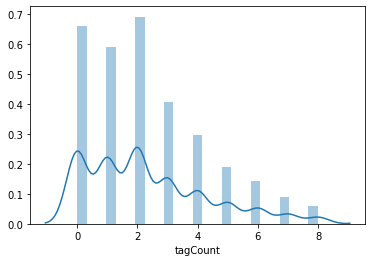

In [531]:
## 컬럼 분포
# sns.distplot(np.log(dataset['price']))
# sns.distplot(np.log(dataset['area']))
# sns.distplot(np.log(dataset['default_person']))

#### 2) Scaling

In [564]:
# 이상치 제거 & 로그화 
def removeOutliers(x, columns):
    columnList=[]
    for column in columns:
        # Q1, Q3구하기
        if(column=="price")|(column=="area"):
            columnList.append(np.log(x[column]))
        else:
            q1 = x[column].quantile(0.25)
            q3 = x[column].quantile(0.75)

            # 1.5 * IQR(Q3 - Q1)
            iqt = 1.5 * (q3 - q1)
            columnList.append(x[column][(x[column] < (q3 + iqt))])
    return columnList

In [565]:
# dataset1=dataset
columnsList=["price","area","default_person","parking","floor","tagCount"]
Outliers_to_drop = removeOutliers(dataset,columnsList)
for i in range(len(columnsList)):
    dataset1[columnsList[i]]=Outliers_to_drop[i]


In [539]:
# scaling

robustScaler = RobustScaler()
robustScaler.fit(dataset1.loc[:,["price","area","default_person","parking","floor"]])
train_data_robustScaled = robustScaler.transform(dataset1.loc[:,["price","area","default_person","parking","floor"]])

C:\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
C:\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


In [541]:
columnsList=["price","area","default_person","parking","floor"]
for i in range(len(dataset1)):
    dataset1.loc[:i+1,columnsList]=train_data_robustScaled[i]


In [566]:
# 정규화 후 컬럼별 Nan값 처리
def nanHandle(columns):
    for column in columns:
        for i in range(len(column)):
            if len(dataset[dataset[column].isnull()==True][column])>0:
                if column=="price":
                    dataset[column].fillna(np.median(dataset[column]),inplace=True)
                elif column=="area":
                    dataset[column].fillna(np.median(dataset[column]),inplace=True)
                if column=="default_person":
                    dataset[column].fillna(1,inplace=True)
                elif column=="parking":
                    dataset[column].fillna(0,inplace=True)
                elif column=="floor":
                    dataset[column].fillna(1,inplace=True)
                elif column=="tagCount":
                    dataset[column].fillna(0,inplace=True)                    

In [568]:
nanHandle(columnsList)
dataset

,Unnamed: 0,index,NO,img_fold_no,studio_name,studio_picture,imafe_file,category,region,tag,price,area,floor,default_person,parking,description,new_tag1,new_tag2,tagCount
0,656,656,1671,272,에이파트 스튜디오 (studio A part) 영상 / VIDEO,['https://s3.hourplace.co.kr/temp/images/2019/...,['272_0_에이파트_스튜디오_(studio_A_part)_영상__VIDEO.jp...,스튜디오,서울,#렌탈스튜디오#압구정#신사동#영상촬영#사진촬영#주간아이돌촬영지#대형호리존#촬영대행#...,11.385092,5.799093,0.0,1.0,6.0,안녕하세요.\r\n에이파트 스튜디오입니다.\r\n\r\n소규모 촬영이 많아지는 요즘...,"['렌탈', '영상', '압구정', '신사동', '촬영', '대행', '호리', '...","['렌탈', '영상', '압구정', '촬영']",0.0
1,567,567,1547,148,에이파트 스튜디오 (studio A part) 사진 / photography,['https://s3.hourplace.co.kr/image/user/1815/2...,['148_0_에이파트_스튜디오_(studio_A_part)_사진__photogra...,스튜디오,서울,#대형호리존#렌탈스튜디오#압구정로데오역#학동사거리#사진촬영#영상촬영#발렛서비스,11.608236,5.828946,0.0,15.0,6.0,안녕하세요.\r\n에이파트 스튜디오입니다.\r\n\r\n소규모 촬영이 많아지는 요즘...,"['렌탈', '영상', '촬영', '학동', '발렛', '호리', '사거리', '대...","['촬영', '사거리', '서비스']",0.0
2,131,131,1034,11,가로수길 에이라운지,['https://s3.hourplace.co.kr/image/user/7960/2...,"['11_0_가로수길_에이라운지.jpg', '11_1_가로수길_에이라운지.jpg',...",스튜디오,서울,#가로수길#신사역#지하#라운지#독특#강연#팬미팅#소규모행사#전시#행사,9.711116,4.290459,0.0,15.0,0.0,신사역 가로수길 메인 길에 위치한 에이라운지입니다 .\r\n천정고가 굉장히 높은 지...,"['강연', '지하', '행사', '라운지', '신사역', '소규모', '팬미팅',...","['강연', '행사', '라운지', '신사역', '전시']",4.0
3,132,132,1622,223,가로수길 에이라운지,['https://s3.hourplace.co.kr/image/user/7960/2...,"['223_0_가로수길_에이라운지.jpg', '223_1_가로수길_에이라운지.jpg...",스튜디오,서울,#가로수길#신사역#지하#라운지#독특#강연#팬미팅#소규모행사#전시#행사,9.711116,4.290459,0.0,15.0,0.0,신사역 가로수길 메인 길에 위치한 에이라운지입니다 .\r\n천정고가 굉장히 높은 지...,"['강연', '지하', '행사', '라운지', '신사역', '소규모', '팬미팅',...","['강연', '행사', '라운지', '신사역', '전시']",4.0
4,569,569,1519,120,k_studio 케이스튜디오,['https://s3.hourplace.co.kr/temp/images/2019/...,"['120_0_k_studio_케이스튜디오.jpg', '120_1_k_studio_...",스튜디오,서울,#댄스#스튜디오운동,11.097410,5.789960,0.0,1.0,2.0,"댄스. gx, 운동 , 커뮤니티 장소","['운동', '댄스', '커뮤니티', '운동', '장소', '댄스']","['운동', '장소', '댄스']",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,338,338,84,83,청주 고층 뷰 아파트,['https://s3.hourplace.co.kr/temp/images/2019/...,"['83_0_청주_고층_뷰_아파트.jpg', '83_1_청주_고층_뷰_아파트.jpg...",아파트,충북,#고층뷰#고층아파트#노을#불빛#석양#야경#청주지웰시티1차,11.225243,4.859812,1.0,10.0,3.0,현재살고 있는 집이에요~\r\n이사올때 서향이라 고민했지만 365일 매일 다른 석양...,"['아파트', '석양', '청주', '야경', '고층', '노을', '매일', '석...","['아파트', '석양', '청주', '야경', '고층', '노을']",0.0
1848,355,355,266,265,모던 & 로맨틱 인테리어 일산 신축 주상복합,['https://s3.hourplace.co.kr/temp/images/2019/...,"['265_0_모던_&_로맨틱_인테리어_일산_신축_주상복합.jpg', '265_1_...",아파트,경기,#골드&블루#일산#모던인테리어#심플#FullFurnished,11.034890,4.691348,1.0,10.0,3.0,일산 신축 주상복합 건물입니다\r\n침실 3 화장실 2개의 33평형 집입니다.\r\...,"['일산', '블루', '심플', '골드', '모던', '연출', '칼라', '조율...","['일산', '블루', '골드']",2.0
1849,1032,1032,416,415,부산이 한눈에 내려다 보이는 뷰 맛집,['https://s3.hourplace.co.kr/temp/images/2019/...,"['415_0_부산이_한눈에_내려다_보이는_뷰_맛집.jpg', '415_1_부산이_...",아파트,부산,#시티뷰#부산#동래구#야경#뷰맛집#부산촬영#노을#아파트#뷰#고층,10.545341,4.753590,1.0,5.0,5.0,"부산광역시 동래구에 위치한 아시아드경기장이 바로 보이는 고층 아파트이며, 부산의 노...","['아파트', '야경', '부산', '촬영', '동래구', '고층', '노을', '...","['아파트', '야경', '부산', '고층', '노을', '맛집']",2.0
1850,1033,1033,1059,36,부산이 한눈에 내려다 보이는 뷰 맛집,['https://s3.hourplace.co.kr/temp/images/2019/...,"['36_0_부산이_한눈에_내려다_보이는_뷰_맛집.jpg', '36_1_부산이_한눈...",아파트,부산,#시티뷰#부산#동래구#야경#뷰맛집#부산촬영#노을#아파트#뷰#고층,10.545341,4.753590,1.0,5.0,5.0,"부산광역시 동래구에 위치한 아시아드경기장이 바로 보이는 고층 아파트이며, 부산의 노...","['아파트', '야경', '부산', '촬영', '동래구', '고층', '노을', '...","['아파트', '야경', '부산', '고층', '노을', '맛집']",2.0


In [569]:
dataset.to_csv('C:/바탕 화면/playdata/ice/eclipse/Devils_Project/dataWork/controller/total_dataset_trim_newTag_scale_after.csv',
                 sep=',',na_rep='NaN',index =True,encoding='utf-8-sig')

## 계층형 클러스터링

In [649]:
data=dataset[["price","area","tagCount","parking","floor"]]
data

,price,area,tagCount,parking,floor
0,11.385092,5.799093,0.0,6.0,0.0
1,11.608236,5.828946,0.0,6.0,0.0
2,9.711116,4.290459,4.0,0.0,0.0
3,9.711116,4.290459,4.0,0.0,0.0
4,11.097410,5.789960,1.0,2.0,0.0
...,...,...,...,...,...
1847,11.225243,4.859812,0.0,3.0,1.0
1848,11.034890,4.691348,2.0,3.0,1.0
1849,10.545341,4.753590,2.0,5.0,1.0
1850,10.545341,4.753590,2.0,5.0,1.0


In [655]:
from scipy.spatial.distance import pdist, squareform
# dist_mat = pdist(data, metric = "cosine")
# print("거리 행렬: ", dist_mat)

# 거리 값을 matrix(행렬)의 형태로 표현하는 방법? squareform
row_dist = pd.DataFrame(squareform(dist_mat), columns =  data.index, index = data.index)
print(row_dist)

          0         1         2         3         4         5         6     \
0     0.000000  0.000034  0.154246  0.154246  0.042126  0.186417  0.094365   
1     0.000034  0.000000  0.151499  0.151499  0.040467  0.184527  0.092887   
2     0.154246  0.151499  0.000000  0.000000  0.053008  0.018391  0.016857   
3     0.154246  0.151499  0.000000  0.000000  0.053008  0.018391  0.016857   
4     0.042126  0.040467  0.053008  0.053008  0.000000  0.101374  0.041637   
...        ...       ...       ...       ...       ...       ...       ...   
1847  0.024429  0.022911  0.094027  0.094027  0.012061  0.148587  0.071056   
1848  0.036471  0.034969  0.050647  0.050647  0.013108  0.080102  0.026622   
1849  0.016782  0.016400  0.099167  0.099167  0.038012  0.111823  0.046274   
1850  0.016782  0.016400  0.099167  0.099167  0.038012  0.111823  0.046274   
1851  0.225237  0.222563  0.017812  0.017812  0.118385  0.007932  0.033524   

          7         8         9     ...      1842      1843    

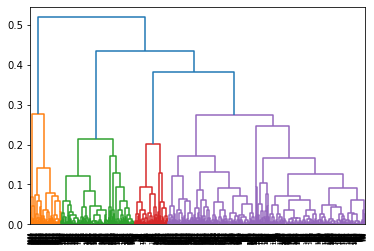

In [662]:
from scipy.cluster.hierarchy import linkage
# row_cluster = linkage(dist_mat, method = "complete")
# df = pd.DataFrame(row_cluster, 
#                   columns = ["클러스터1", "클러스터2", "거리", "클러스터 멤버 수"],
#                   index = ["클러스터%d"%(i + 1) for i in range(row_cluster.shape[0])])
# print(df)

from scipy.cluster.hierarchy import dendrogram
row_dend = dendrogram(row_cluster, labels = data.index)

In [666]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 2, 
                             affinity = "cosine", linkage = "complete")
labels = ac.fit_predict()
print("분류 결과: ", labels)

ValueError: could not convert string to float: '에이파트 스튜디오 (studio A part) 영상 / VIDEO'